This project was completed by insert full name here in partial fulfilment of ECON-UB.0232,
Data Bootcamp, Spring 2018. I certify that the NYU Stern Honor Code applies to this project.
In particular, I have:
Clearly acknowledged the work and efforts of others when submitting written work as our own.
The incorporation of the work of others–including but not limited to their ideas, data, creative
expression, and direct quotations (which should be designated with quotation marks), or paraphrasing
thereof– has been fully and appropriately referenced using notations both in the text
and the bibliography.
And I understand that:
Submitting the same or substantially similar work in multiple courses, either in the same semester
or in a different semester, without the express approval of all instructors is strictly forbidden.
I acknowledge that a failure to abide by NYU Stern Honor Code will result in a failing grade for
the project and course.
With this project we have executed a study of citibank through the study of demographics, mainly age and gender. We have come to the conclusion that citibike should mainly focus on marketing their program to males between the ages of 18-30 and 60-80 given that these users experience the highest average cost per minute from riding. If Citi Bike attracts customers who use the program least, they will be able to spread their assets amonst more customers. Unfortunately, we were unable to provide significant correlations between variables in our data and a further investigation with a larger dataset should be done to prove our conclusions.

In [63]:
%matplotlib inline 

import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import numpy as np
import statsmodels.formula.api as smf
usrs=71429

In [2]:
citi = pd.read_csv('C:/Users/Kanyanta/Desktop/datascience/Citi/201501-citibike-tripdata.csv')
for i in ('08','09','10'):
    t = pd.read_csv('C:/Users/Kanyanta/Desktop/datascience/Citi/2015'+i+'-citibike-tripdata.csv')
    citi = citi.append(t)

In [3]:
#citi.to_csv("CitiNew", encoding='utf-8')

In [4]:
citi

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969.0,2
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991.0,1


In [5]:
del citi['usertype']

In [6]:
del citi['end station name']

In [7]:
del citi['start station id']

In [8]:
del citi['start station name']

In [9]:
del citi['end station id']

In [10]:
citi

,tripduration,starttime,stoptime,start station latitude,start station longitude,end station latitude,end station longitude,bikeid,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,40.750020,-73.969053,40.722293,-73.991475,18660,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,40.743174,-74.003664,40.739355,-73.999318,16085,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,40.740964,-73.986022,40.749013,-73.988484,20845,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,40.683178,-73.965964,40.688515,-73.964763,19610,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,40.745168,-73.986831,40.726218,-73.983799,20197,1977.0,1
5,496,1/1/2015 0:07,1/1/2015 0:15,40.750073,-73.998393,40.735238,-74.000271,20788,1969.0,2
6,152,1/1/2015 0:07,1/1/2015 0:09,40.748549,-73.988084,40.745168,-73.986831,19006,1972.0,1
7,1183,1/1/2015 0:08,1/1/2015 0:28,40.739323,-74.008119,40.738177,-73.977387,17640,1985.0,2
8,846,1/1/2015 0:09,1/1/2015 0:23,40.762272,-73.987882,40.756458,-73.993722,15691,1991.0,1
9,576,1/1/2015 0:10,1/1/2015 0:20,40.748238,-73.978311,40.738177,-73.977387,17837,1991.0,1


In [11]:
citi['Age']=2018-citi['birth year']
citi['Gender']=citi.gender.map({1:'Male',2:'Female'})

In [12]:
citi=citi[citi['tripduration']>60]
citi=citi[citi['tripduration']<7200]
citi=citi[citi['Age']<91]

In [13]:
citi

,tripduration,starttime,stoptime,start station latitude,start station longitude,end station latitude,end station longitude,bikeid,birth year,gender,Age,Gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,40.750020,-73.969053,40.722293,-73.991475,18660,1960.0,2,58.0,Female
1,363,1/1/2015 0:02,1/1/2015 0:08,40.743174,-74.003664,40.739355,-73.999318,16085,1963.0,1,55.0,Male
2,346,1/1/2015 0:04,1/1/2015 0:10,40.740964,-73.986022,40.749013,-73.988484,20845,1974.0,1,44.0,Male
3,182,1/1/2015 0:04,1/1/2015 0:07,40.683178,-73.965964,40.688515,-73.964763,19610,1969.0,1,49.0,Male
4,969,1/1/2015 0:05,1/1/2015 0:21,40.745168,-73.986831,40.726218,-73.983799,20197,1977.0,1,41.0,Male
5,496,1/1/2015 0:07,1/1/2015 0:15,40.750073,-73.998393,40.735238,-74.000271,20788,1969.0,2,49.0,Female
6,152,1/1/2015 0:07,1/1/2015 0:09,40.748549,-73.988084,40.745168,-73.986831,19006,1972.0,1,46.0,Male
7,1183,1/1/2015 0:08,1/1/2015 0:28,40.739323,-74.008119,40.738177,-73.977387,17640,1985.0,2,33.0,Female
8,846,1/1/2015 0:09,1/1/2015 0:23,40.762272,-73.987882,40.756458,-73.993722,15691,1991.0,1,27.0,Male
9,576,1/1/2015 0:10,1/1/2015 0:20,40.748238,-73.978311,40.738177,-73.977387,17837,1991.0,1,27.0,Male


In [14]:
citi.dropna()

,tripduration,starttime,stoptime,start station latitude,start station longitude,end station latitude,end station longitude,bikeid,birth year,gender,Age,Gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,40.750020,-73.969053,40.722293,-73.991475,18660,1960.0,2,58.0,Female
1,363,1/1/2015 0:02,1/1/2015 0:08,40.743174,-74.003664,40.739355,-73.999318,16085,1963.0,1,55.0,Male
2,346,1/1/2015 0:04,1/1/2015 0:10,40.740964,-73.986022,40.749013,-73.988484,20845,1974.0,1,44.0,Male
3,182,1/1/2015 0:04,1/1/2015 0:07,40.683178,-73.965964,40.688515,-73.964763,19610,1969.0,1,49.0,Male
4,969,1/1/2015 0:05,1/1/2015 0:21,40.745168,-73.986831,40.726218,-73.983799,20197,1977.0,1,41.0,Male
5,496,1/1/2015 0:07,1/1/2015 0:15,40.750073,-73.998393,40.735238,-74.000271,20788,1969.0,2,49.0,Female
6,152,1/1/2015 0:07,1/1/2015 0:09,40.748549,-73.988084,40.745168,-73.986831,19006,1972.0,1,46.0,Male
7,1183,1/1/2015 0:08,1/1/2015 0:28,40.739323,-74.008119,40.738177,-73.977387,17640,1985.0,2,33.0,Female
8,846,1/1/2015 0:09,1/1/2015 0:23,40.762272,-73.987882,40.756458,-73.993722,15691,1991.0,1,27.0,Male
9,576,1/1/2015 0:10,1/1/2015 0:20,40.748238,-73.978311,40.738177,-73.977387,17837,1991.0,1,27.0,Male


In [15]:
citi.dropna()

,tripduration,starttime,stoptime,start station latitude,start station longitude,end station latitude,end station longitude,bikeid,birth year,gender,Age,Gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,40.750020,-73.969053,40.722293,-73.991475,18660,1960.0,2,58.0,Female
1,363,1/1/2015 0:02,1/1/2015 0:08,40.743174,-74.003664,40.739355,-73.999318,16085,1963.0,1,55.0,Male
2,346,1/1/2015 0:04,1/1/2015 0:10,40.740964,-73.986022,40.749013,-73.988484,20845,1974.0,1,44.0,Male
3,182,1/1/2015 0:04,1/1/2015 0:07,40.683178,-73.965964,40.688515,-73.964763,19610,1969.0,1,49.0,Male
4,969,1/1/2015 0:05,1/1/2015 0:21,40.745168,-73.986831,40.726218,-73.983799,20197,1977.0,1,41.0,Male
5,496,1/1/2015 0:07,1/1/2015 0:15,40.750073,-73.998393,40.735238,-74.000271,20788,1969.0,2,49.0,Female
6,152,1/1/2015 0:07,1/1/2015 0:09,40.748549,-73.988084,40.745168,-73.986831,19006,1972.0,1,46.0,Male
7,1183,1/1/2015 0:08,1/1/2015 0:28,40.739323,-74.008119,40.738177,-73.977387,17640,1985.0,2,33.0,Female
8,846,1/1/2015 0:09,1/1/2015 0:23,40.762272,-73.987882,40.756458,-73.993722,15691,1991.0,1,27.0,Male
9,576,1/1/2015 0:10,1/1/2015 0:20,40.748238,-73.978311,40.738177,-73.977387,17837,1991.0,1,27.0,Male


In [16]:
citi.describe()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,bikeid,birth year,gender,Age
count,3.372554e+06,3.372554e+06,3.372554e+06,3.372554e+06,3.372554e+06,3.372554e+06,3.372554e+06,3.372554e+06,3.372554e+06
mean,7.363967e+02,4.073622e+01,-7.398889e+01,4.073588e+01,-7.398906e+01,2.021684e+04,1.977003e+03,1.239152e+00,4.099717e+01
std,5.434387e+02,2.016099e-02,1.436770e-02,2.006677e-02,1.439341e-02,2.970967e+03,1.140671e+01,4.297636e-01,1.140671e+01
min,6.100000e+01,4.067891e+01,-7.401713e+01,4.064677e+01,-7.404630e+01,1.452900e+04,1.930000e+03,0.000000e+00,1.900000e+01
25%,3.710000e+02,4.072217e+01,-7.399884e+01,4.072210e+01,-7.399915e+01,1.760300e+04,1.969000e+03,1.000000e+00,3.200000e+01
50%,5.860000e+02,4.073705e+01,-7.399009e+01,4.073705e+01,-7.399009e+01,2.079100e+04,1.980000e+03,1.000000e+00,3.800000e+01
75%,9.390000e+02,4.075097e+01,-7.398057e+01,4.075066e+01,-7.398093e+01,2.289000e+04,1.986000e+03,1.000000e+00,4.900000e+01
max,7.199000e+03,4.078721e+01,-7.392989e+01,4.078721e+01,-7.392989e+01,2.474300e+04,1.999000e+03,2.000000e+00,8.800000e+01


In [17]:
citi['tripduration'].mean()

736.3966545828473

In [18]:
citi.to_csv("CitiFinalData2",)

In [19]:
citi.drop

<bound method DataFrame.drop of          tripduration            starttime            stoptime  \
0                1346        1/1/2015 0:01       1/1/2015 0:24   
1                 363        1/1/2015 0:02       1/1/2015 0:08   
2                 346        1/1/2015 0:04       1/1/2015 0:10   
3                 182        1/1/2015 0:04       1/1/2015 0:07   
4                 969        1/1/2015 0:05       1/1/2015 0:21   
5                 496        1/1/2015 0:07       1/1/2015 0:15   
6                 152        1/1/2015 0:07       1/1/2015 0:09   
7                1183        1/1/2015 0:08       1/1/2015 0:28   
8                 846        1/1/2015 0:09       1/1/2015 0:23   
9                 576        1/1/2015 0:10       1/1/2015 0:20   
10                540        1/1/2015 0:10       1/1/2015 0:19   
11                419        1/1/2015 0:11       1/1/2015 0:18   
12                751        1/1/2015 0:13       1/1/2015 0:25   
13                332        1/1/2015 0:13  

In [ ]:
citi

(-1.1045095633687003,
 1.1052032311155244,
 -1.104410047727207,
 1.1002100218026478)

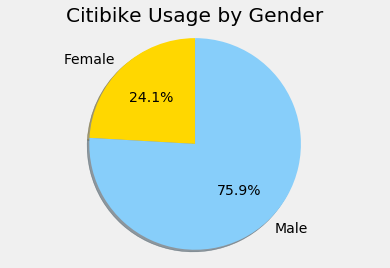

In [26]:
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue', 'lightcoral']
ax1.pie(citi.groupby(citi['Gender']).size(), colors=colors,autopct='%1.1f%%',shadow=True, startangle=90,labels=['Female','Male'])
ax1.set_title("Citibike Usage by Gender")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


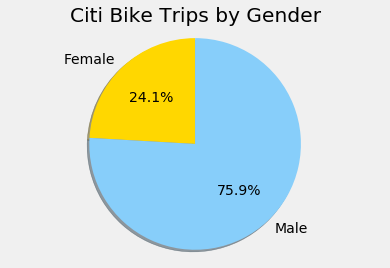

In [27]:
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue', 'lightcoral']
ax1.pie(citi.groupby(citi['Gender']).size(), colors=colors,autopct='%1.1f%%',shadow=True, startangle=90,labels=['Female','Male'])
ax1.set_title("Citi Bike Trips by Gender")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.style.use('fivethirtyeight')

In [ ]:
citi.dropna()

In [28]:
citi2=citi.groupby('Gender', as_index=False).tripduration.mean()

In [ ]:
citi2

NameError: name 'plot' is not defined

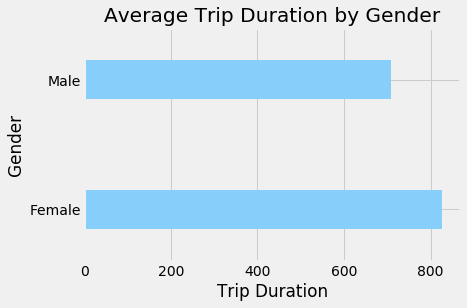

In [30]:
axes=citi2.plot.barh(x='Gender',title='Average Trip Duration by Gender',label='Trip Duration',color='lightskyblue',width=0.3)
axes.get_legend().remove()
plt.xlabel('Trip Duration')
plot.style.use('fivethirtyeight')

In [31]:
citi3=citi.groupby('Age', as_index=False).tripduration.mean()

In [32]:
citi3

,Age,tripduration
0,19.0,733.780936
1,20.0,689.000705
2,21.0,699.439565
3,22.0,632.791437
4,23.0,632.012658
5,24.0,656.594047
6,25.0,709.762344
7,26.0,690.011159
8,27.0,713.239540
9,28.0,713.507885


In [34]:
ageGroups = citi.groupby((pd.cut(citi.Age, [0,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90]))).tripduration.mean()

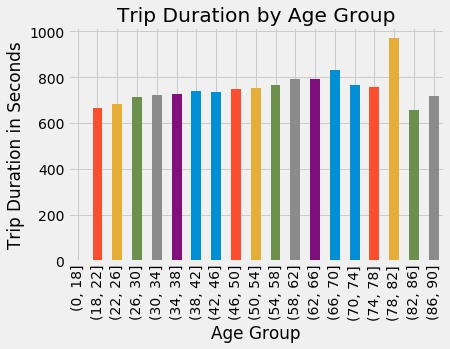

In [35]:
fig1, ax1 = plt.subplots()
ageGroups.plot(ax=ax1,kind='bar')
#ageGroups.plot(ax=ax1[1],kind='pie')
plt.title('Trip Duration by Age Group')
plt.ylabel('Trip Duration in Seconds')
plt.xlabel('Age Group')
plt.style.use('seaborn-pastel')

In [ ]:
ageGroups.describe()

In [ ]:
citi.Age.min()

In [ ]:
fig1, ax1 = plt.subplots(2,1)
ageGroups.plot(ax=ax1[0],kind='line')
ageGroups.plot(ax=ax1[1],kind='bar',figsize=(7,6))
#ageGroups.plot(ax=ax1[1],kind='pie')
plt.title('Trip Duration by Age Group')
plt.tight_layout(pad=0.04, w_pad=0.5, h_pad=1.0)
plt.ylabel('Trip Duration')
plt.xlabel('Age Group')
plt.style.use('seaborn-pastel')

In [38]:
ageGroups2 = citi.groupby((pd.cut(citi.Age, [0,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98]),'Gender')).tripduration.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


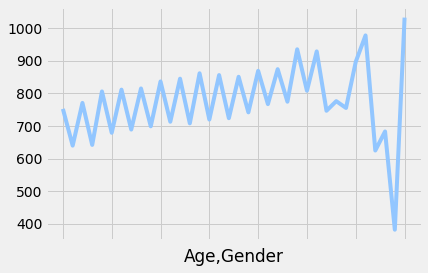

In [39]:
ageGroups2.plot()

In [43]:
ageGroups2

Age       Gender
(18, 22]  Female     752.371063
          Male       639.647764
(22, 26]  Female     770.707872
          Male       641.826776
(26, 30]  Female     805.962499
          Male       679.036067
(30, 34]  Female     811.472486
          Male       688.919147
(34, 38]  Female     815.110939
          Male       698.850369
(38, 42]  Female     836.594903
          Male       712.895390
(42, 46]  Female     845.133651
          Male       707.945839
(46, 50]  Female     861.646093
          Male       719.558996
(50, 54]  Female     856.157227
          Male       723.792772
(54, 58]  Female     850.928989
          Male       741.717116
(58, 62]  Female     869.139480
          Male       766.983333
(62, 66]  Female     874.234287
          Male       774.381856
(66, 70]  Female     935.262614
          Male       808.021967
(70, 74]  Female     928.812753
          Male       746.665327
(74, 78]  Female     776.072827
          Male       755.240902
(78, 82]  Female     89

In [45]:
ageGroups5 = citi.groupby((pd.cut(citi.Age, [0,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98]))).size()

In [48]:
ageGroups5.reset_index()

,Age,0
0,"(0, 18]",0
1,"(18, 22]",29153
2,"(22, 26]",150166
3,"(26, 30]",468224
4,"(30, 34]",550314
5,"(34, 38]",490350
6,"(38, 42]",359939
7,"(42, 46]",296277
8,"(46, 50]",295664
9,"(50, 54]",230895


In [ ]:
labels=ageGroups5.ix[:,0]

In [ ]:
fig1, ax1

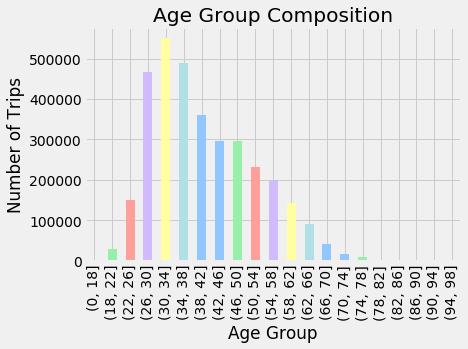

In [49]:
#citiloc=ageGroups5[:,'Age']
labels='0-18','18-22','22-26','26-30','30-34','34-38','38-42','42-46','46-50','50-54','54-58','58-62','62-66','66-70','70-74','74-78','78-82','82-86','86-90','90-94','94-98'
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue', 'lightcoral']
ageGroups5.plot(ax=ax1,kind='BAR')
plt.title('Age Group Composition')
plt.ylabel('Number of Trips')
plt.xlabel('Age Group')
plt.style.use('seaborn-pastel')
#ax1.legend()



In [52]:
ageGroups5

Age
(0, 18]          0
(18, 22]     29153
(22, 26]    150166
(26, 30]    468224
(30, 34]    550314
(34, 38]    490350
(38, 42]    359939
(42, 46]    296277
(46, 50]    295664
(50, 54]    230895
(54, 58]    199241
(58, 62]    141826
(62, 66]     90126
(66, 70]     41678
(70, 74]     16910
(74, 78]      9576
(78, 82]      1697
(82, 86]       458
(86, 90]        60
(90, 94]         0
(94, 98]         0
dtype: int64

In [53]:
citi.tripduration.mean()

736.3966545828473

In [54]:
ageAn = citi.groupby((pd.cut(citi.Age, [0,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98]))).tripduration.sum()

In [55]:
ageAn

Age
(0, 18]             0
(18, 22]     19413981
(22, 26]    102345843
(26, 30]    334952362
(30, 34]    398047114
(34, 38]    356793551
(38, 42]    266437785
(42, 46]    217672946
(46, 50]    220924758
(50, 54]    173443014
(54, 58]    152783232
(58, 62]    112295491
(62, 66]     71533896
(66, 70]     34652630
(70, 74]     12986034
(74, 78]      7266648
(78, 82]      1644655
(82, 86]       300469
(86, 90]        43074
(90, 94]            0
(94, 98]            0
Name: tripduration, dtype: int64

In [56]:
Age01 = pd.DataFrame()

In [57]:
Age01['Sum Duration']=citi.groupby((pd.cut(citi.Age, [0,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98]))).tripduration.sum()
Age01['Count']=citi.groupby((pd.cut(citi.Age, [0,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98]))).tripduration.size()
Age01['Duration Per Capita']=Age01['Sum Duration']/Age01['Count']*(len(citi.index)/usrs)
Age01['Cost_Per_Capita']=37.25/Age01['Duration Per Capita']*60
Age01.reset_index(level=0, inplace=True)
Age01.reset_index(level=0, inplace=True)
Age01

,index,Age,Sum Duration,Count,Duration Per Capita,Cost_Per_Capita
0,0,"(0, 18]",0,0,NaN,NaN
1,1,"(18, 22]",19413981,29153,31442.400098,0.071082
2,2,"(22, 26]",102345843,150166,32179.770100,0.069454
3,3,"(26, 30]",334952362,468224,33776.427749,0.066170
4,4,"(30, 34]",398047114,550314,34151.380207,0.065444
5,5,"(34, 38]",356793551,490350,34355.411786,0.065055
6,6,"(38, 42]",266437785,359939,34950.327599,0.063948
7,7,"(42, 46]",217672946,296277,34688.926380,0.064430
8,8,"(46, 50]",220924758,295664,35280.138541,0.063350
9,9,"(50, 54]",173443014,230895,35467.177261,0.063016


In [58]:
Age01

,index,Age,Sum Duration,Count,Duration Per Capita,Cost_Per_Capita
0,0,"(0, 18]",0,0,NaN,NaN
1,1,"(18, 22]",19413981,29153,31442.400098,0.071082
2,2,"(22, 26]",102345843,150166,32179.770100,0.069454
3,3,"(26, 30]",334952362,468224,33776.427749,0.066170
4,4,"(30, 34]",398047114,550314,34151.380207,0.065444
5,5,"(34, 38]",356793551,490350,34355.411786,0.065055
6,6,"(38, 42]",266437785,359939,34950.327599,0.063948
7,7,"(42, 46]",217672946,296277,34688.926380,0.064430
8,8,"(46, 50]",220924758,295664,35280.138541,0.063350
9,9,"(50, 54]",173443014,230895,35467.177261,0.063016


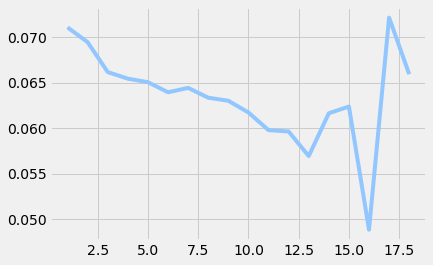

In [60]:
Age01['Cost_Per_Capita'].plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

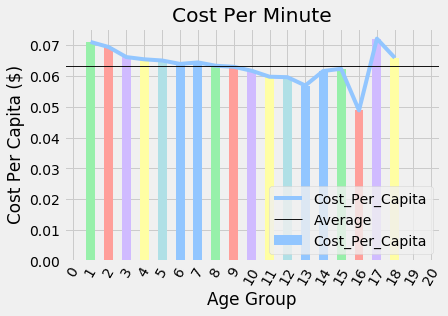

In [61]:
fig1, ax1 = plt.subplots()
Age01['Cost_Per_Capita'].plot(ax=ax1,kind='line')
Age01['Cost_Per_Capita'].plot(ax=ax1,kind='bar')
#plt.axis([0,10,0.04,0.06])
plt.axhline(Age01['Cost_Per_Capita'].mean(),linewidth=0.9,color='black',alpha=1,label='Average')
plt.legend()
#Age01['Cost Per Capita'].plot(ax=ax1,kind='bar')
#Age01['Cost Per Capita'].plot(kind='bar',secondary_y=True)
#ageGroups.plot(ax=ax1[1],kind='pie')
plt.title('Cost Per Minute')
plt.ylabel('Cost Per Capita ($)')
plt.xlabel('Age Group')
plt.style.use('bmh')
plt.xticks(rotation=60)


In [62]:
print(smf.ols('tripduration ~ Age + gender',data=citi).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                 1.927e+04
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:54:36   Log-Likelihood:            -2.6006e+07
No. Observations:             3372554   AIC:                         5.201e+07
Df Residuals:                 3372551   BIC:                         5.201e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    483.6462      1.434    337.383      0.0

In [ ]:
del Age01['index']

In [ ]:
Age01

In [ ]:
citi[['Age','Sum Duration','Cost Per Capita']].corr()

In [ ]:
plt.matshow(Age01.corr())

In [ ]:
Age01.corr()

In [ ]:
Age01